# Salary Predictions Based on Job Descriptions

# Part 1 - DEFINE

### ---- 1 Define the problem ----

The goal of this notebook is to create a model that predicts a numerical Salary given key words from a job description. Using years experience, miles from city, industry, job type, major and highest level of education, this model will predict salaries within an MSE training score of under 360. 

Interesting trends are visualized in various scatterplots below.  Preliminary EDA shows that the data fairly distributed among the features--though 'NONE' is chosen for over half of the 'major' feature--which is also tied to level of education (no degrees plus High school diplomas). 

There seems to be some weak positive correlation to years experience and weak negative correlation to miles from the Metropolis category. 

The scatterplots in color show these slight correlation. 

The baseline model finds the average salary for each Job type and using that measure to make predictions. The baseline MSE metric is 956. 

The features in this project were made by hand versus using sklearn Polynomial features method. 

In [17]:
import sklearn.linear_model as linear_model
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error

In [18]:
#import your libraries
import pandas as pd
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

%matplotlib inline
#your info here
__author__ = "Sarah Hudspeth"
__email__ = "shhudspeth@gmail.com"

## Part 2 - DISCOVER

### ---- 2 Load the data ----

In [19]:
#load the data into a Pandas dataframe
df = pd.read_csv("../train_salaries.csv")
df_f = pd.read_csv("../train_features.csv")

In [50]:
# Combine Features and Salary DataFrames for ease of comparison
df_f['salary'] = df['salary']
target_ = df[df['salary']!=0]['salary']

### ---- 3 Clean the data ----

In [21]:
#look for duplicate data, invalid data (e.g. salaries <=0), or corrupt data and remove it

In [22]:
# check for null values
df_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
salary                 1000000 non-null int64
dtypes: int64(3), object(6)
memory usage: 68.7+ MB


In [23]:
#drop the salaries that are zero (okay to do--we have enough samples/instances)
df_f= df_f[df_f['salary']!=0]
len(df_f)

999995

In [24]:
# no duplicates
df_f[df_f.duplicated()]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary


### ---- 4 Explore the data (EDA) ----

In [25]:
#summarize each feature variable
#summarize the target variable
#look for correlation between each feature and the target
#look for correlation between features

df_f.describe()

,yearsExperience,milesFromMetropolis,salary
count,999995.000000,999995.000000,999995.000000
mean,11.992407,49.529381,116.062398
std,7.212390,28.877721,38.717163
min,0.000000,0.000000,17.000000
25%,6.000000,25.000000,88.000000
50%,12.000000,50.000000,114.000000
75%,18.000000,75.000000,141.000000
max,24.000000,99.000000,301.000000


## Some basic EDA

<function matplotlib.pyplot.show(*args, **kw)>

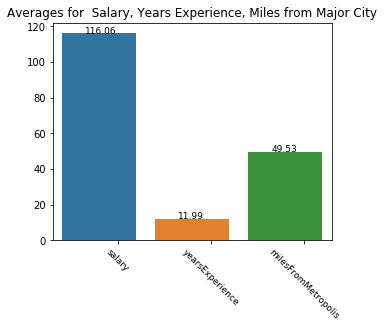

In [26]:
cols = [ 'salary','yearsExperience', 'milesFromMetropolis']
_means = [df_f[x].mean() for x in cols]

fig, ax = plt.subplots(figsize = (5,4))
sns.barplot(x=cols, y= _means)
#plt.bar(range(len(cols)), _means, tick_label=cols)
x_loc, x_la = plt.xticks()
plt.xticks(x_loc + .2, rotation=-45, fontsize = 9)
plt.title('Averages for  Salary, Years Experience, Miles from Major City')

totals = []
for i in ax.patches:
    totals.append(i.get_height())

for i, data in zip(ax.patches,_means):
    ax.text(i.get_x()+.25, i.get_height()+.01, 
            str(round(data, 2)), fontdict=dict(fontsize=9))
plt.savefig("ave_sal_years_Ex_miles.png") 
plt.show

## Violin Plots of the Salary Distrution for Major Feature Categories

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


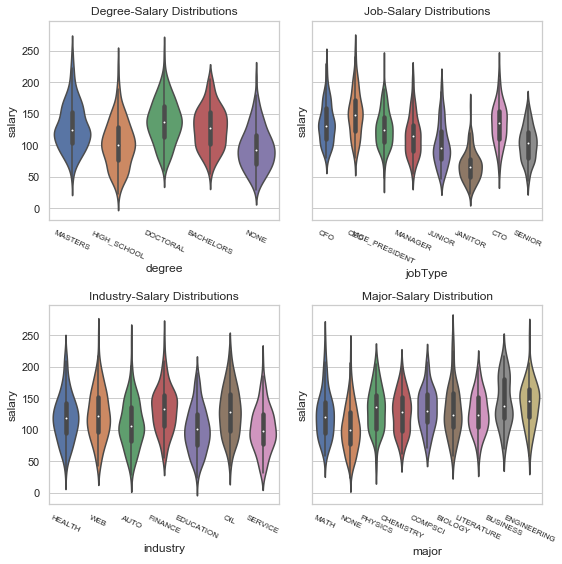

In [27]:

sns.set(style="whitegrid")
fig, ax = plt.subplots(2, 2, sharey=True, figsize=(8,8))
fig.subplots_adjust(hspace=.5)

ax[0,0]= sns.violinplot(x='degree', y="salary", data=df_f[0:999], ax =ax[0,0] )
ax[0,0].set_title('Degree-Salary Distributions')
ax[0,1] = sns.violinplot(x='jobType', y="salary", data=df_f[0:999], ax = ax[0,1])
ax[0,1].set_title('Job-Salary Distributions')
ax[1,0] = sns.violinplot(x='industry', y="salary", data=df_f[0:999], ax = ax[1,0])
ax[1,0].set_title('Industry-Salary Distributions')
ax[1,1] = sns.violinplot(x='major', y="salary", data=df_f[0:999], ax = ax[1,1])
plt.title('Major-Salary Distribution')
# ax6 = sns.violinplot(x='milesFromMetropolis', y="salary", data=df_f[0:999])
plt.setp(ax[0,0].get_xticklabels(), rotation=-25, fontsize=8); 
plt.setp(ax[1,0].get_xticklabels(), rotation=-25, fontsize=8);
plt.setp(ax[0,1].get_xticklabels(), rotation=-25,fontsize=8) ;
plt.setp(ax[1,1].get_xticklabels(), rotation=-25, fontsize=8) ;

plt.tight_layout()
plt.savefig('violinplotsSalaryDistributions.png')

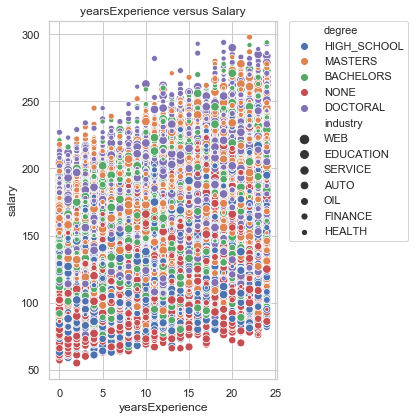

In [28]:

def graph_scatterplot(x_value, hue_cat, size_cat, jobType_cat):
    fig1, ax1 = plt.subplots(figsize=(6,6))
    ax1 = sns.scatterplot(x=x_value, y="salary", hue=hue_cat,size=size_cat, data=df_f[df_f['jobType']==jobType_cat])
    string_title = str(x_value) + ' versus Salary'
    plt.title(string_title)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.tight_layout()
    plt.savefig(str(x_value)+str(hue_cat)+'hue'+str(size_cat)+'size'+jobType_cat)
    plt.show()

graph_scatterplot("yearsExperience","degree", 'industry','CEO' )

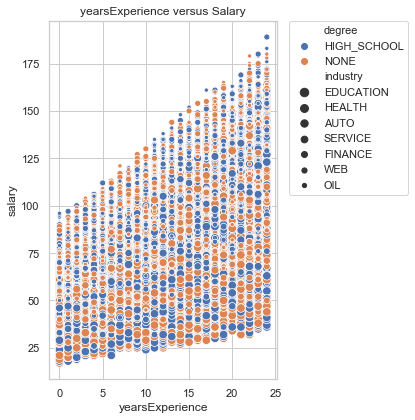

In [29]:
graph_scatterplot("yearsExperience","degree", 'industry','JANITOR' )

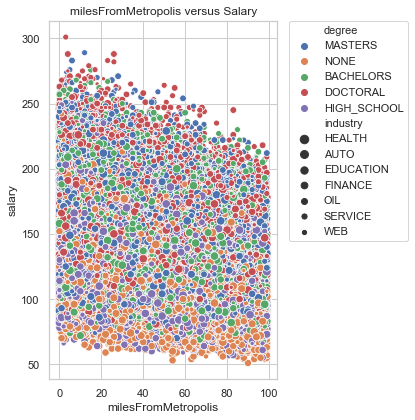

In [30]:
graph_scatterplot("milesFromMetropolis","degree", 'industry','CFO' )

## Average Salaries based on Degree

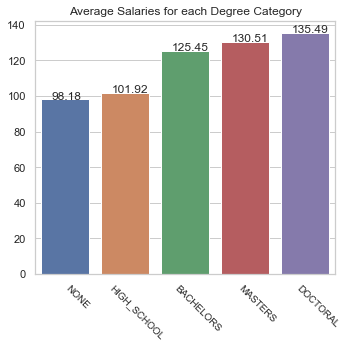

In [31]:
deg_sal = sorted([(df_f[df_f['degree']==x]['salary'].mean(), x) for x in df_f['degree'].unique()])

x_val = []
y_val = []
for y, x in deg_sal:
    y_val.append(y)
    x_val.append(x)

fig3, ax3 = plt.subplots(figsize = (5,5))
sns.barplot(x=x_val, y= y_val)
x_loc, x_la = plt.xticks()
plt.xticks(x_loc + .2, rotation=-45, fontsize = 10)
plt.title('Average Salaries for each Degree Category')

totals = []
for i in ax3.patches:
    totals.append(i.get_height())

for i, data in zip(ax3.patches,y_val):
    ax3.text(i.get_x()+.17, i.get_height()+.01, 
            str(round(data, 2)), fontdict=dict(fontsize=12))
plt.tight_layout()
plt.savefig('ave_sal_by_degree')
plt.show()

## Checking Distributions-- Is there any undersampling that could skew models?

In [32]:
df_f['compId_num'] = df_f['companyId'].str.extract("([0-9]+)").astype(int)

In [33]:
col = ['jobType', 'degree', 'major', 'industry', 'compId_num']
list_feature_list= [df_f[x].unique() for x in col]


In [34]:
counts_jobTypes = [(df_f[df_f['jobType']==x]['major'].count()/len(df_f), x) for x in list_feature_list[0]]
counts_degree = [(df_f[df_f['degree']==x]['jobType'].count()/len(df_f), x) for x in list_feature_list[1]]
counts_major = [(df_f[df_f['major']==x]['major'].count()/len(df_f), x) for x in list_feature_list[2]]
counts_industry = [(df_f[df_f['industry']==x]['major'].count()/len(df_f), x) for x in list_feature_list[3]]
counts_companies = [(df_f[df_f['compId_num']==x]['major'].count()/len(df_f), x) for x in list_feature_list[4]]

In [35]:
counts_jobTypes

[(0.12436962184810924, 'CFO'),
 (0.12477862389311947, 'CEO'),
 (0.12523462617313086, 'VICE_PRESIDENT'),
 (0.125120625603128, 'MANAGER'),
 (0.12459262296311481, 'JUNIOR'),
 (0.1249716248581243, 'JANITOR'),
 (0.12504562522812615, 'CTO'),
 (0.12588662943314716, 'SENIOR')]

In [157]:
counts_degree

[(0.17531087655438277, 'MASTERS'),
 (0.2369761848809244, 'HIGH_SCHOOL'),
 (0.17536287681438406, 'DOCTORAL'),
 (0.17549587747938739, 'BACHELORS'),
 (0.23685418427092136, 'NONE')]

In [158]:
counts_major

[(0.05780028900144501, 'MATH'),
 (0.5323556617783088, 'NONE'),
 (0.058410292051460255, 'PHYSICS'),
 (0.05887529437647188, 'CHEMISTRY'),
 (0.058382291911459556, 'COMPSCI'),
 (0.05837929189645948, 'BIOLOGY'),
 (0.05868429342146711, 'LITERATURE'),
 (0.058518292591462955, 'BUSINESS'),
 (0.05859429297146486, 'ENGINEERING')]

In [159]:
counts_industry

[(0.14275571377856888, 'HEALTH'),
 (0.14320571602858015, 'WEB'),
 (0.14294171470857353, 'AUTO'),
 (0.14286671433357168, 'FINANCE'),
 (0.1428197140985705, 'EDUCATION'),
 (0.14277071385356926, 'OIL'),
 (0.142639713198566, 'SERVICE')]

In [124]:
counts_companies

[(0.015905079525397627, 37),
 (0.01595807979039895, 19),
 (0.015737078685393428, 52),
 (0.015819079095395476, 38),
 (0.015767078835394178, 7),
 (0.015901079505397528, 15),
 (0.015831079155395777, 24),
 (0.015910079550397752, 20),
 (0.015859079295396476, 41),
 (0.015979079895399477, 56),
 (0.01591807959039795, 4),
 (0.015977079885399426, 54),
 (0.015635078175390876, 57),
 (0.0159080795403977, 14),
 (0.015822079110395553, 61),
 (0.015961079805399028, 58),
 (0.0160280801404007, 3),
 (0.016004080020400102, 44),
 (0.016041080205401025, 30),
 (0.01577307886539433, 27),
 (0.015809079045395226, 34),
 (0.015872079360396803, 11),
 (0.015756078780393902, 31),
 (0.015779078895394476, 49),
 (0.01566607833039165, 0),
 (0.0158200791003955, 1),
 (0.015891079455397278, 36),
 (0.015796078980394902, 47),
 (0.015638078190390953, 8),
 (0.015943079715398576, 42),
 (0.015791078955394777, 50),
 (0.015776078880394402, 53),
 (0.015930079650398252, 48),
 (0.015850079250396252, 45),
 (0.015967079835399176, 46),
 

In [125]:
df_f.columns

Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis', 'salary', 'compId_num'],
      dtype='object')

In [36]:
def encode_map_dict(names):
    counts_map = [(y, x+1) for x, y in enumerate(names) ]
    co_maps = dict(counts_map)
    return(co_maps)

def make_unique_sets_encoding(column):
    list_feature_list=df_f[column].unique()
    diction_ = encode_map_dict(list_feature_list)
    return encode_map_dict(list_feature_list)

def encode_columns(df_f):
    for x in ['jobType', 'degree', 'major', 'industry']:
        x_name = str(x) + '_num'
        dict_x = make_unique_sets_encoding(x)
        df_f[x_name]= df_f[x].map(dict_x);
        
        
encode_columns(df_f)

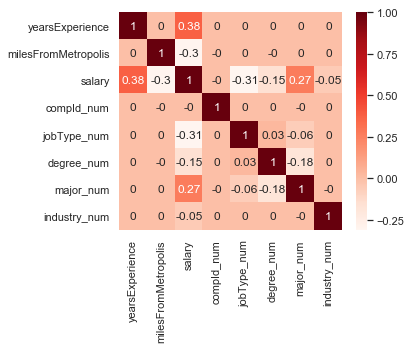

In [37]:
fig1, ax = plt.subplots(1,1, figsize=(5,4))
corr = df_f.corr().round(2)
ax = sns.heatmap(corr, annot=True,cmap='Reds',
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,ax = ax )

plt.savefig('correlationMatrixpreNewFeatures')

### ---- 5 Establish a baseline ----

In [128]:
df_baseline = df_f[['yearsExperience', 'milesFromMetropolis', 'jobType_num', 'degree_num', 
                    'major_num','industry_num', 'compId_num']]
df_baseline.head()

,yearsExperience,milesFromMetropolis,jobType_num,degree_num,major_num,industry_num,compId_num
0,10,83,1,1,1,1,37
1,3,73,2,2,2,2,19
2,10,38,3,3,3,1,52
3,8,17,4,3,4,3,38
4,8,16,3,4,3,4,7


In [129]:
target_ = df[df['salary']!=0]['salary']
feat_X_train, X_test, feat_y_train,y_test = train_test_split(df_baseline, target_, 
                                                             test_size=0.33, random_state=42)

In [130]:
mean_jobtypes = [(x, df_f[df_f['jobType_num']==x]['salary'].mean()) for x in df_f['jobType_num'].unique()]

In [131]:
X_baseline = X_test.copy()

In [132]:
X_baseline['ave_sal']= X_baseline['jobType_num'].map(dict(mean_jobtypes))
y_baseline = X_baseline['ave_sal']

## BASELINE MSE

In [133]:
mse = mean_squared_error(y_test, y_baseline)
mse

965.0181479205409

### ---- 6 Hypothesize solution ----

#brainstorm 3 models that you think may improve results over the baseline model based
#on your 

gradient booster, GaussianNB(), neural network

new features: square of years experience, square of major num, years experiemce * major num

Brainstorm 3 models that you think may improve results over the baseline model based on your EDA and explain why they're reasonable solutions here.

Also write down any new features that you think you should try adding to the model based on your EDA, e.g. interaction variables, summary statistics for each group, etc

## Part 3 - DEVELOP

You will cycle through creating features, tuning models, and training/validing models (steps 7-9) until you've reached your efficacy goal

#### Your metric will be MSE and your goal is:
 - <360 for entry-level data science roles
 - <320 for senior data science roles

### ---- 7 Engineer features  ----

In [38]:
#make sure that data is ready for modeling
#create any new features needed to potentially enhance model

In [39]:
df_f['yearsExperience_scaled'] = (df_f['yearsExperience'] - 
                                  df_f['yearsExperience'].min())/(df_f['yearsExperience'].max() - 
                                                                  df_f['yearsExperience'].min())

In [40]:
df_f['yearsEx_TIMESmaj'] = df_f['yearsExperience_scaled'] / df_f['jobType_num'] *df_f['major_num']
df_f['yearsEx_DIVSmaj'] = df_f['yearsExperience_scaled'] / df_f['jobType_num'] /df_f['major_num']

In [41]:
df_f['milesFromMetropolis_min'] = (df_f['milesFromMetropolis']- 
                                   df_f['milesFromMetropolis'].min())/(df_f['milesFromMetropolis'].max() - 
                                                                       df_f['milesFromMetropolis'].min()  )

In [42]:
df_f.drop(labels= ['yearsExperience', 'milesFromMetropolis'], axis=1, inplace=True)

In [43]:
df_f.drop(labels = ['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry'], axis=1, inplace=True)

In [44]:
df_f.columns

Index(['salary', 'compId_num', 'jobType_num', 'degree_num', 'major_num',
       'industry_num', 'yearsExperience_scaled', 'yearsEx_TIMESmaj',
       'yearsEx_DIVSmaj', 'milesFromMetropolis_min'],
      dtype='object')

In [45]:
## New Correlation Matrix to see if we've boosted anything

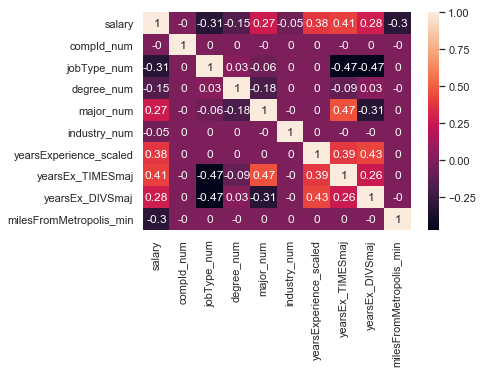

In [46]:
corr = df_f.corr().round(2)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           annot=True)
plt.savefig("correlationmatric_newfeatures")
plt.show()

In [56]:
df_f.drop(labels= ['salary'], axis=1, inplace=True)

In [57]:
df_to_train = df_f

## SPLIT DATA INTO TEST AND TRAINING

In [58]:
feat_X_train, X_test, feat_y_train,y_test = train_test_split(df_to_train, target_, test_size=0.33, random_state=42)


### ---- 8 Create models ----

## Least Squares Model

In [59]:
least_squares_model = linear_model.LinearRegression()
cross_val_score(least_squares_model, feat_X_train,feat_y_train, cv=5, scoring='neg_mean_squared_error')

array([-879.87729958, -878.87438591, -880.9773631 , -879.06157629,
       -881.68875439])

In [60]:
least_squares_model.fit(feat_X_train,feat_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [61]:
y_train_pred = least_squares_model.predict(feat_X_train)
y_test_pred = least_squares_model.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(feat_y_train, y_train_pred),
                                       mean_squared_error(y_test, y_test_pred)))

MSE train: 880.063, test: 882.577


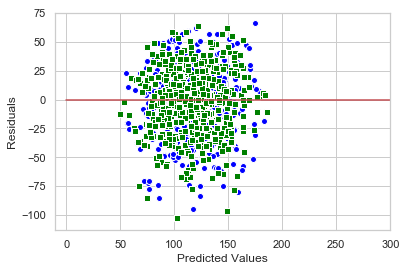

In [62]:
plt.scatter(y_train_pred[:500], y_train_pred[:500]-feat_y_train[:500], c='blue', marker = 'o', edgecolor='white', label = 'Training Data')
plt.scatter(y_test_pred[:500], y_test_pred[:500]-y_test[:500], c='green', marker = 's', edgecolor='white', label = 'Test Data')
plt.plot(range(500), np.zeros(500), 'r')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.xlim([-10,300])
plt.savefig('LinearRegressionResidualPlot.png')
plt.show()

## Random Forest Regressor

In [63]:
#create and tune the models that you brainstormed during part 2

cross_val_score(RandomForestRegressor(n_jobs=-1), feat_X_train,feat_y_train, cv=5, scoring='neg_mean_squared_error')

array([-443.98150268, -447.34146232, -447.99707388, -447.82605882,
       -442.01334533])

In [64]:
clf = RandomForestRegressor(n_jobs=-1).fit(feat_X_train, feat_y_train)

In [65]:
y_train_pred = clf.predict(feat_X_train)
y_test_pred = clf.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(feat_y_train, y_train_pred),
                                       mean_squared_error(y_test, y_test_pred)))

MSE train: 78.983, test: 444.618


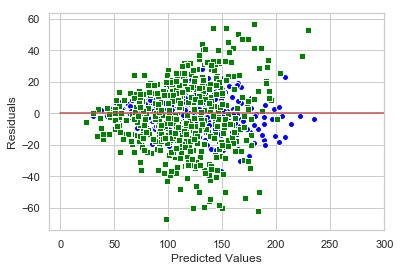

In [66]:
plt.scatter(y_train_pred[:500], y_train_pred[:500]-feat_y_train[:500], c='blue', marker = 'o', edgecolor='white', label = 'Training Data')
plt.scatter(y_test_pred[:500], y_test_pred[:500]-y_test[:500], c='green', marker = 's', edgecolor='white', label = 'Test Data')
plt.plot(range(500), np.zeros(500), 'r')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.xlim([-10,300])
plt.savefig('RandomForestRegressorResidualPlot.png')


## Gradient Boosting Regressor

In [67]:
cross_val_score(GradientBoostingRegressor(warm_start=True), feat_X_train,feat_y_train,n_jobs=-1, cv=5, scoring='neg_mean_squared_error')


array([-390.9466002 , -392.59706231, -389.85739438, -389.37890167,
       -387.86752102])

In [68]:
clf = GradientBoostingRegressor(random_state=42, n_estimators = 500, max_depth=4, warm_start=True)
clf.fit(feat_X_train, feat_y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, presort='auto', random_state=42,
             subsample=1.0, verbose=0, warm_start=True)

In [69]:
y_train_pred = clf.predict(feat_X_train)
y_test_pred = clf.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(feat_y_train, y_train_pred),
                                       mean_squared_error(y_test, y_test_pred)))

MSE train: 354.063, test: 357.357


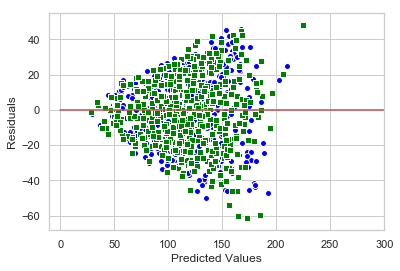

In [70]:
plt.scatter(y_train_pred[:500], y_train_pred[:500]-feat_y_train[:500], c='blue', marker = 'o', edgecolor='white', label = 'Training Data')
plt.scatter(y_test_pred[:500], y_test_pred[:500]-y_test[:500], c='green', marker = 's', edgecolor='white', label = 'Test Data')
plt.plot(range(500), np.zeros(500), 'r')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.xlim([-10,300])
plt.savefig('GradientBoostingResidualPlot.png')



### ---- 9 Test models ----

see above

### ---- 10 Select best model  ----

#select the model with the lowest error as your "production" model

GBR

## Part 4 - DEPLOY

### ---- 11 Automate pipeline ----

In [110]:
#write script that trains model on entire training set, saves model to disk,
#and scores the "test" dataset

def encode_map_dict(names):
    counts_map = [(y, x+1) for x, y in enumerate(names) ]
    co_maps = dict(counts_map)
    return(co_maps)

def make_unique_sets_encoding(column, df_z):
    list_feature_list=df_z[column].unique()
    diction_ = encode_map_dict(list_feature_list)
    return encode_map_dict(list_feature_list)

def encode_columns(df_y):
    for x in ['jobType', 'degree', 'major', 'industry']:
        x_name = str(x) + '_num'
        dict_x = make_unique_sets_encoding(x, df_y)
        df_y[x_name]= df_y[x].map(dict_x);
        

def scale_and_label_new_features_drop(df_x):
    # Encodes training data with numerical information
    encode_columns(df_x)
    
    # Scales appropriate columns    
   
    df_x['yearsExperience_scaled'] = (df_x['yearsExperience'] - 
                                  df_x['yearsExperience'].min())/(df_x['yearsExperience'].max() - 
                                                                  df_x['yearsExperience'].min())
    df_x['milesFromMetropolis_min'] = (df_x['milesFromMetropolis']- 
                                   df_x['milesFromMetropolis'].min())/(df_x['milesFromMetropolis'].max() - 
                                                                 df_x['milesFromMetropolis'].min()  )
     # Adds new features
    df_x['yearsEx_TIMESmaj'] = df_x['yearsExperience_scaled'] / df_x['jobType_num'] *df_x['major_num']
    df_x['yearsEx_DIVSmaj'] = df_x['yearsExperience_scaled'] / df_x['jobType_num'] /df_x['major_num']
    df_x['major/degree'] = df_x['major_num']/df_x['degree_num']


    
    #Drops categorial features
    df_x.drop(labels= ['yearsExperience', 'milesFromMetropolis', 'jobId', 
                       'companyId', 'jobType', 'degree', 'major', 'industry'], axis=1, inplace=True)
    
    #Drops Target Value
    try: 
        df_x.drop(labels= ['salary'], axis=1, inplace=True)
    except:
        pass
    
    return df_x

def deploy_solution():
    
    # Loads and combines data to check for nulls
    df = pd.read_csv("../train_salaries.csv")
    df_f = pd.read_csv("../train_features.csv")
    
    df_f['salary'] = df['salary']
    df_f= df_f[df_f['salary']!=0]
    df_f = df_f[df_f.notnull()]
    target = df[df['salary']!=0]['salary']
    
    # Encodes training data with numerical information
    # Scales appropriate columns    
    # Adds new features
    #Drops unnecessary labels
    
    df_to_train = scale_and_label_new_features_drop(df_f)
    # print('made training data')
    
    #trains and Fits Model
    feat_X_train, X_test, feat_y_train,y_test = train_test_split(df_to_train, target, 
                                                                 test_size=0.2, random_state=42)
    clf = GradientBoostingRegressor(random_state=42, loss='ls', learning_rate =.1,
                                    n_estimators = 500, max_depth=4, verbose=10, warm_start=True);
    clf.fit(feat_X_train, feat_y_train)
    # print('trained model')
    
    #Loads and Pre-processes testing data
    df_test = pd.read_csv('../test_features.csv')
    df_test = df_test[df_test.notnull()]
    df_test = scale_and_label_new_features_drop(df_test)
    
    
    #Uses the Model to predict salaries
    df_test['test_salaries'] = clf.predict(df_test).round(2)
    efficacy_check =clf.predict(X_test).round(2)
    print('MSE test: %.3f' % (mean_squared_error(y_test, efficacy_check) ))
    
    return(df_test)
    
    

### ---- 12 Deploy solution ----

In [111]:
#save your prediction to a csv file or optionally save them as a table in a SQL database
#additionally, you want to save a visualization and summary of your prediction and feature importances
#these visualizations and summaries will be extremely useful to business stakeholders

final_solution = deploy_solution();


Index(['jobType_num', 'degree_num', 'major_num', 'industry_num',
       'yearsExperience_scaled', 'milesFromMetropolis_min', 'yearsEx_TIMESmaj',
       'yearsEx_DIVSmaj', 'major/degree'],
      dtype='object')
made training data
      Iter       Train Loss   Remaining Time 
         1        1347.7742           38.65m
         2        1222.5895           36.54m
         3        1118.5635           35.09m
         4        1032.2952           33.95m
         5         962.2391           33.17m
         6         906.1922           32.75m
         7         852.9499           32.51m
         8         805.7449           32.58m
         9         767.3407           32.98m
        10         735.9997           32.64m
        11         708.5540           32.44m
        12         684.2870           32.29m
        13         659.9054           32.04m
        14         636.2644           31.83m
        15         616.1804           31.57m
        16         601.0844           31.41m
     

       177         356.3604           20.36m
       178         356.3151           20.29m
       179         356.2922           20.25m
       180         356.2539           20.21m
       181         356.2246           20.17m
       182         356.2071           20.10m
       183         356.1779           20.04m
       184         356.1575           19.98m
       185         356.1313           19.91m
       186         356.1125           19.84m
       187         356.0962           19.78m
       188         356.0819           19.70m
       189         356.0587           19.63m
       190         356.0034           19.56m
       191         355.9686           19.53m
       192         355.9355           19.51m
       193         355.9027           19.46m
       194         355.8745           19.41m
       195         355.8502           19.34m
       196         355.8301           19.27m
       197         355.8157           19.20m
       198         355.7976           19.15m
       199

       360         353.2170            8.58m
       361         353.2068            8.51m
       362         353.1948            8.45m
       363         353.1886            8.39m
       364         353.1777            8.33m
       365         353.1576            8.27m
       366         353.1494            8.21m
       367         353.1377            8.15m
       368         353.1311            8.09m
       369         353.1125            8.03m
       370         353.1048            7.96m
       371         353.0979            7.89m
       372         353.0864            7.83m
       373         353.0718            7.78m
       374         353.0610            7.72m
       375         353.0495            7.66m
       376         353.0417            7.60m
       377         353.0294            7.53m
       378         353.0188            7.47m
       379         353.0067            7.41m
       380         352.9950            7.35m
       381         352.9901            7.29m
       382

In [102]:
final_solution.head()

,jobType_num,degree_num,major_num,industry_num,yearsExperience_scaled,milesFromMetropolis_min,yearsEx_TIMESmaj,yearsEx_DIVSmaj,major/degree,test_salaries
0,1,1,1,1,0.916667,0.737374,0.916667,0.916667,1.000000,147.70
1,2,2,1,2,0.833333,0.474747,0.416667,0.416667,0.500000,180.22
2,3,3,2,1,0.708333,0.090909,0.472222,0.118056,0.666667,163.10
3,1,1,1,3,0.583333,0.969697,0.583333,0.583333,1.000000,125.77
4,2,4,2,3,0.416667,0.444444,0.416667,0.104167,0.500000,134.75


In [112]:
final_solution.to_csv("Predicted_Salaries_2019.csv")